# Flight Price Prediction

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing the training Dataset

In [2]:
df_train = pd.read_excel("Data_Train_flight_price.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The Above given dataset gives us the information about the price of different airlines. For predicting the price from the given data we would need to take help from other features given in the dataset.

Since Our target variable is "Price" which is a continuous data so it is a Regression type problem so we need to solve this model using regression algorithm to predict the prices of the flight price.

## Exploratory Data Analysis (EDA)

In [3]:
df_train.shape

(10683, 11)

So here we can see that we have 10683 Rows and 11 columns in our Dataset. In Which 10 are independent variables and 1 is our dependent variable which is our target variable i.e "Price".

In [4]:
# Checking the overview of the Dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


This gives us the information about the Dataset which includes indexing type, column type, non-null values and memory status.

In [5]:
# Checking the type of dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see that the Train dataset contains two type of data object and integer type data.

## Feature Enginerring

- The Columns Date_of_Journey, Dep_Time and Arrival_Time is showing object data type which means python is not able to understand the type of data in these columns
- Thus, We have to convert the datatype into timestamp to use them for proper prediction.

In [6]:
# Converting Data and Time Column from object data type to Datetime type
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])

In [7]:
# Again checking the datatype 
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now we have converted Object datatype into datetime datatype.

First we will split Date_of_Journey into Month and Day, since the dataset contains only 2019 data so we dont need to change the year.

In [8]:
# Extracting Day from Date_of_Journey column
df_train["Journey_Day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
df_train["Journey_Month"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [9]:
# Dropping Date_of_Journey column
df_train.drop("Date_of_Journey",axis=1,inplace=True)

In [10]:
duration=list(df_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [11]:
df_train['Duration']=duration

In [12]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-15 05:50:00,2022-02-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-15 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-15 18:05:00,2022-02-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-02-15 16:50:00,2022-02-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [14]:
df_train['Duration_hour']=df_train['Duration'].apply(hour)
df_train['Duration_min']=df_train['Duration'].apply(minutes)
df_train.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-02-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-02-15 05:50:00,2022-02-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-02-15 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-02-15 18:05:00,2022-02-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-02-15 16:50:00,2022-02-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2022-02-15 09:00:00,2022-02-15 11:25:00,2h 25m,non-stop,No info,3873,24,6,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-02-15 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-02-15 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-02-15 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-02-15 11:25:00,2022-02-15 19:15:00,7h 50m,1 stop,No info,8625,27,5,7,50


In [15]:
df_train['Duration_hour'] = df_train['Duration_hour'].astype(int)
df_train['Duration_min'] = df_train['Duration_min'].astype(int)

In [16]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
df_train["Dep_Hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
df_train["Dep_Min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

Now we have extracted hour and minute from Dep_Time and Duration column so we can drop this column as it is of no use.

In [17]:
# Dropping Dep_Time column
df_train.drop("Dep_Time",axis=1,inplace=True)
df_train.drop("Duration",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [18]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
df_train["Arrival_Hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df_train["Arrival_Min"] = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
df_train.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [19]:
df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2,40,11,30,14,10


In [20]:
df_train.shape

(10683, 15)

Now the dataset contains 10683 rows and 15 columns.

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset

In [21]:
# Checking the value counts of each columns
for i in df_train.columns:
        print(df_train[i].value_counts())
        print('****************************************')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR      

These are the list of values present in the columns.

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [22]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
df_train["Airline"] = df_train["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
df_train["Airline"] = df_train["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
df_train["Airline"] = df_train["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
df_train["Destination"] = df_train["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
df_train["Additional_Info"] = df_train["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
df_train["Additional_Info"] = df_train["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

Now let's check the value counts in the above columns

In [23]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(df_train[i].value_counts())
    print("**********************************")

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
**********************************
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
**********************************
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64
**********************************


In [24]:
# Checking number of unique values in each column
df_train.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Duration_hour        44
Duration_min         12
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

These are the number of unique values present in each columns.

In [25]:
# Checking null values in the dataframe
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hour      0
Duration_min       0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can find missing values in Route and Total_Stops column. We can directly use dropna method but these two columns have categorical data so we can fill the null values using mode method.

## Treating null values using imputation techniques

In [26]:
# let's check the mode of the categorical columns to fill the null values 
print("The mode of Route is:",df_train["Route"].mode())  # we will fill the null values using its mode
print("The mode of Total_Stops is:",df_train["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


DEL → BOM → COK and 1 stop are the modes of Route and Total_Stops.

In [27]:
# Filling missing values in Route by its mode DEL → BOM → COK
df_train["Route"] = df_train["Route"].fillna(df_train["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
df_train["Total_Stops"] = df_train["Total_Stops"].fillna(df_train["Total_Stops"].mode()[0])

We have filled the missing values in the columns.

In [28]:
# Checking missing values again
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hour      0
Duration_min       0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can observe there are no null values in any of the columns.

<AxesSubplot:>

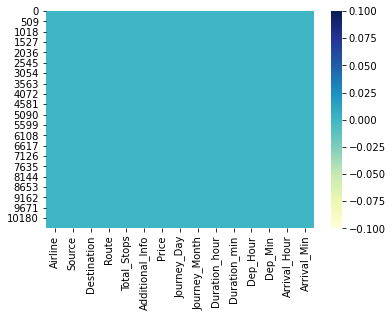

In [29]:
# Let's visualize the null values clearly
sns.heatmap(df_train.isnull(), cmap="YlGnBu")

So it is clear that there are no missing values found.

In [30]:
# Checking how many columns are there in the dataset
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hour', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Min'],
      dtype='object')

In [31]:
# Checking the uniqueness of target column
df_train["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

These are the unique values present in the target column.

In [32]:
# Checking the list of counts in target columns
df_train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

These are the value counts in the target column.

## Description of Dataset

In [33]:
# Statistical Summary of Dataset
df_train.describe()

,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things:

- The counts of every column is same which means there are no missing values present in the dataset.
- The mean value is greater than the median(50%) in the columns Price, Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right.
- The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.
- From the description we can say the minimum price of the flight ticket is Rs.1759 and maximum price is Rs.79512 also the mean is 9087.
- In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Arrival_Min, that means huge outliers present in those columns. These differences can also be seen in many other columns.

Before going to visualize the data, we will separate numerical and categorical column for better understanding.

In [34]:
# checking for categorical columns
categorical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [35]:
# Now checking for numerical columns
numerical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Price', 'Journey_Day', 'Journey_Month', 'Duration_hour', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


## Data Visualization
### Univariate Analysis
### Plotting categorical columns

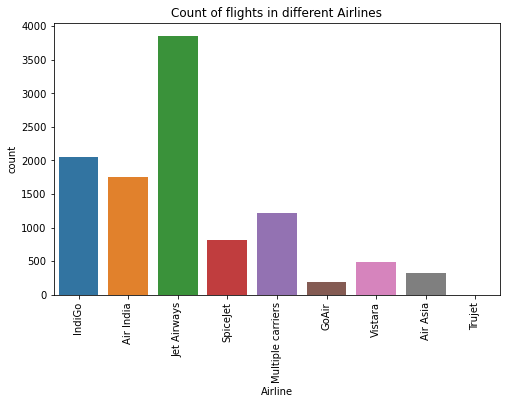

In [36]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(df_train["Airline"])
plt.title("Count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

The count of flights is high in Jet Airways and the count is very less in Trujet and GoAir category.

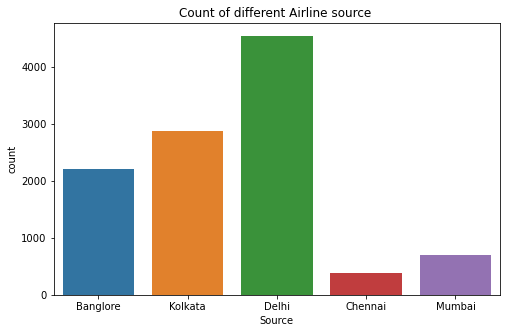

In [37]:
# Visualizing the source from which place the service begins 
plt.figure(figsize=(8,5))
sns.countplot(df_train["Source"])
plt.title("Count of different Airline source ")
plt.show()

The count of source is high in Delhi which means most of the flighs service begins in Delhi.

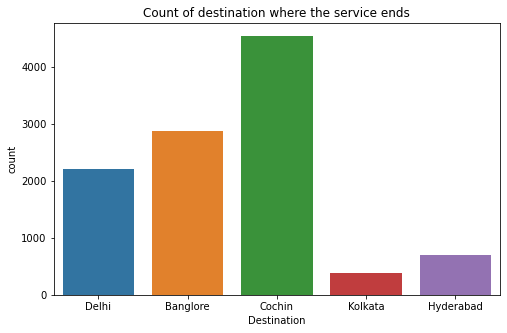

In [38]:
# Visualizing the destination where the service ends 
plt.figure(figsize=(8,5))
sns.countplot(df_train["Destination"])
plt.title("Count of destination where the service ends")
plt.show()

The Cochin destination has highest counts. Most of the flights services ends in Cochin destination.

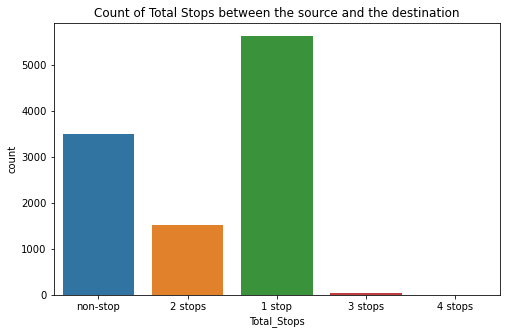

In [39]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(8,5))
sns.countplot(df_train["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

The count is high in 1 stop followed by non-stop. Most of the flights have only 1 stop between the source and the destination. No flights have 4 stops between the source and destination.

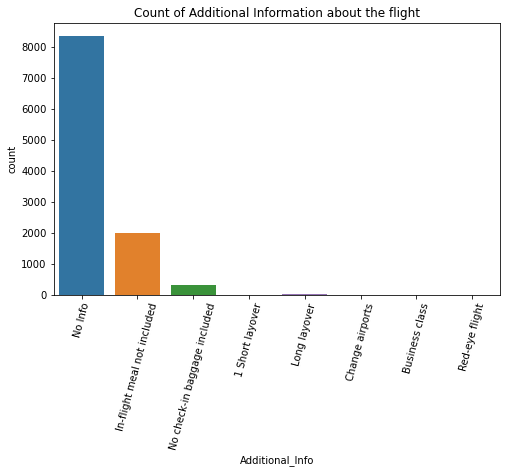

In [40]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(df_train["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

There is no much information about the flights that we can see in the plot.

## Distribution of skewness
### Plotting numerical columns

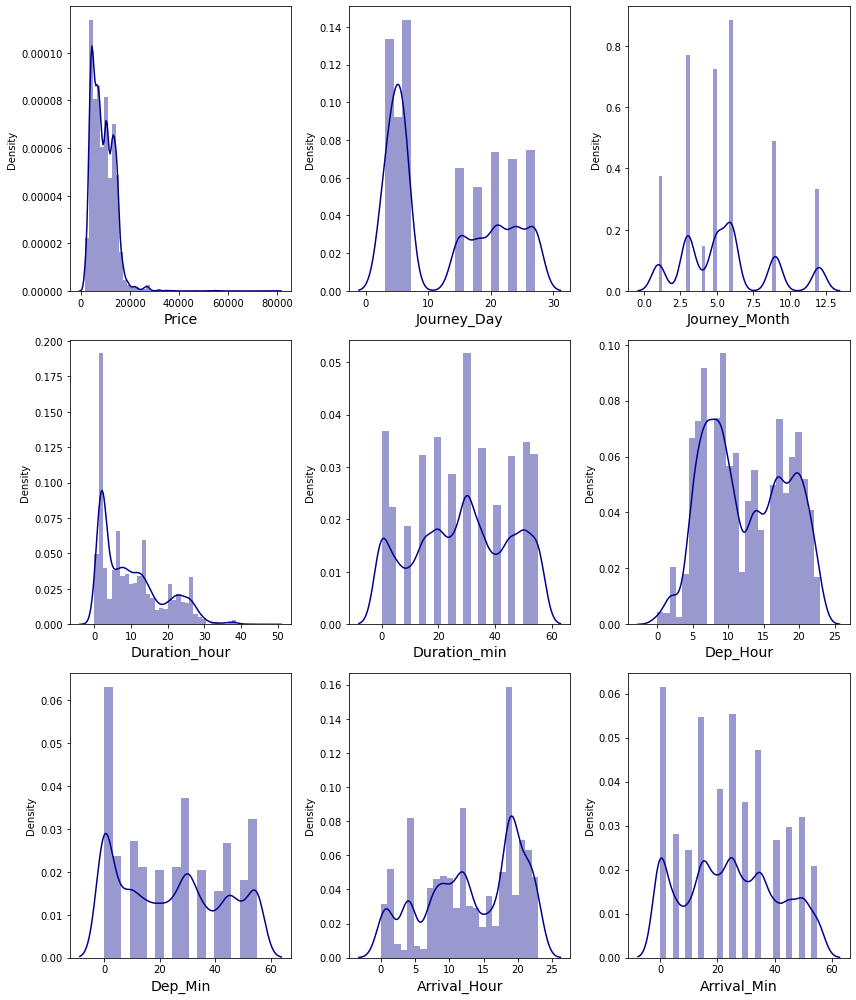

In [41]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,14),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_train[column],color="darkblue")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the distribution plot we can observe the data is not normally distributed in some columns and some columns are almost normal but have no proper bell shape curve. The Journey_Month, Duration_hours and Price columns are skewed to right as the mean is more than the median in those columns.

## Bivariate Analysis

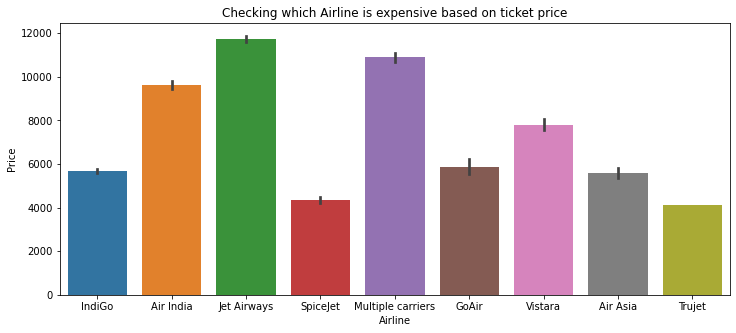

In [42]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(12,5))
sns.barplot(df_train["Airline"],df_train["Price"],data=df_train)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

The bar plot shows that the Jet Airways is most expensive Airline followed by Multiple carriers and Air India.
The Trujet and Spicejet are have very cheap ticket prices compared to others.

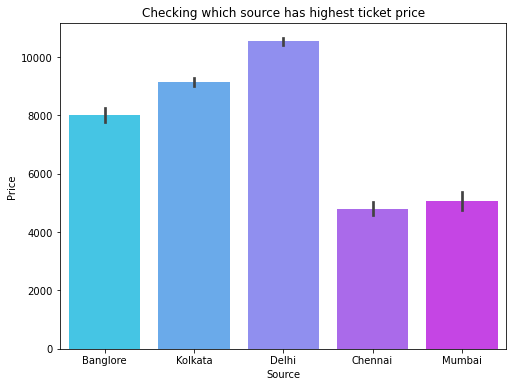

In [43]:
# Let's check the ticket prices in different sources

plt.figure(figsize=(8,6))
sns.barplot(df_train["Source"],df_train["Price"],data=df_train,palette="cool")
plt.title("Checking which source has highest ticket price")
plt.show()

The tickes prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources.

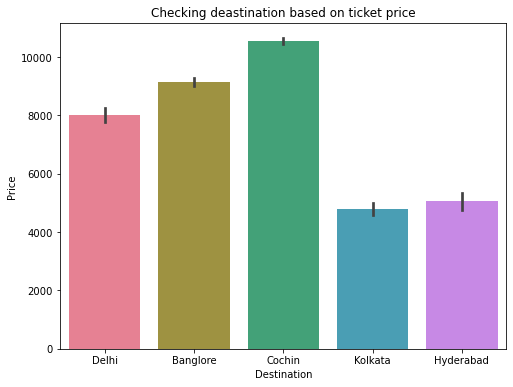

In [44]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(8,6))
sns.barplot(df_train["Destination"],df_train["Price"],data=df_train,palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is high in Cochin destination followed by Bangalore which means they have long distance from the source.

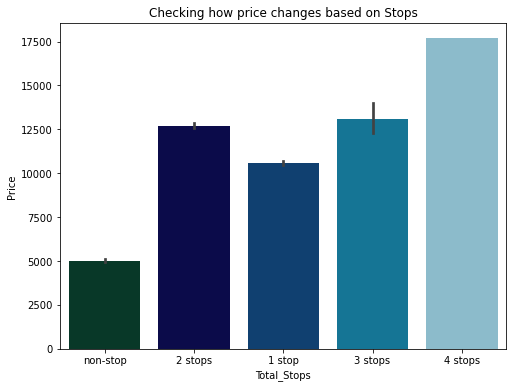

In [45]:
# Let's check the price vs total stops

plt.figure(figsize=(8,6))
sns.barplot(df_train["Total_Stops"],df_train["Price"],data=df_train,palette="ocean")
plt.title("Checking how price changes based on Stops")
plt.show()

Here the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

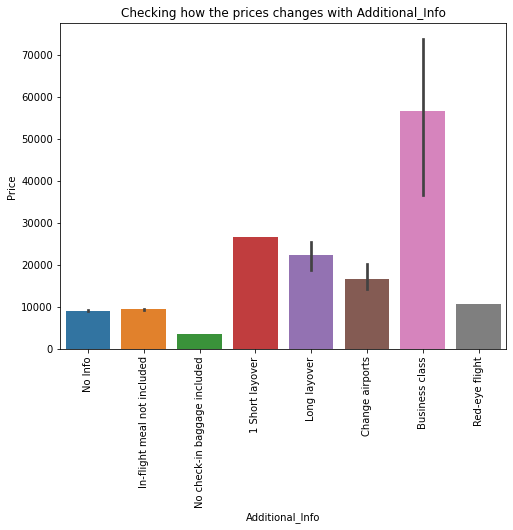

In [46]:
# Let's compare Additional_Info and Price of the flights

plt.figure(figsize=(8,6))
sns.barplot(df_train["Additional_Info"],df_train["Price"],data=df_train)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

The plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

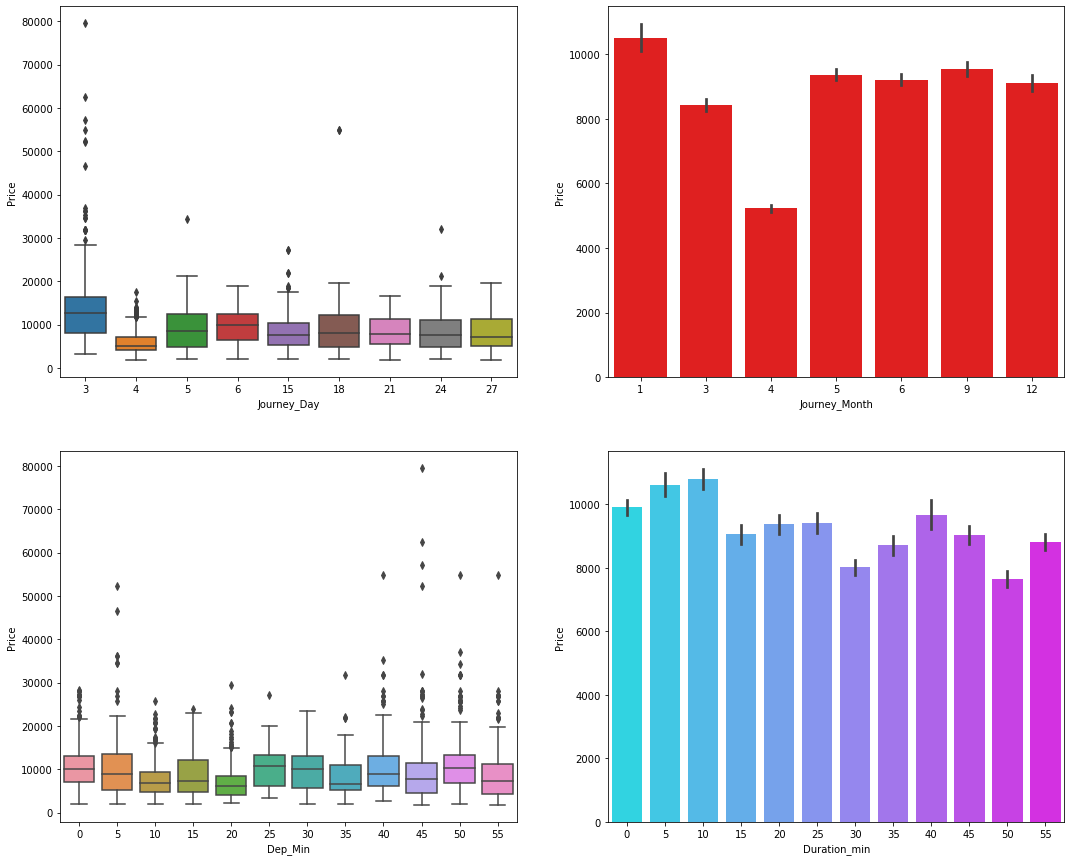

In [47]:
fig,axes=plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxplot(x='Journey_Day',y='Price',ax=axes[0,0],data=df_train)

# Checking relation between Journey_Month and Price
sns.barplot(x='Journey_Month',y='Price',ax=axes[0,1],data=df_train,color="r")

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df_train)

# Checking relation between Duration_mins and Price
sns.barplot(x='Duration_min',y='Price',ax=axes[1,1],data=df_train,palette="cool")
plt.show()

From the above plots we can observe the following

- While comparing Journey_Day and Price we can see the price of ticket is high in day 3 apart from this there is no much impact of day on ticket price.
- While comparing Journey_Month and Price it can be inferred that the flights travelling in the January month are more expensive than others and the flights travelling in April month have very cheap ticket prices.
- There in no significance relation between Dep_MIn and Price of the tickets.
- In the fourth graph also we can say there is no much impact of Duraation_mins on Price. But we can say duration minutes 10 and 5 have bit high prices compared to others.

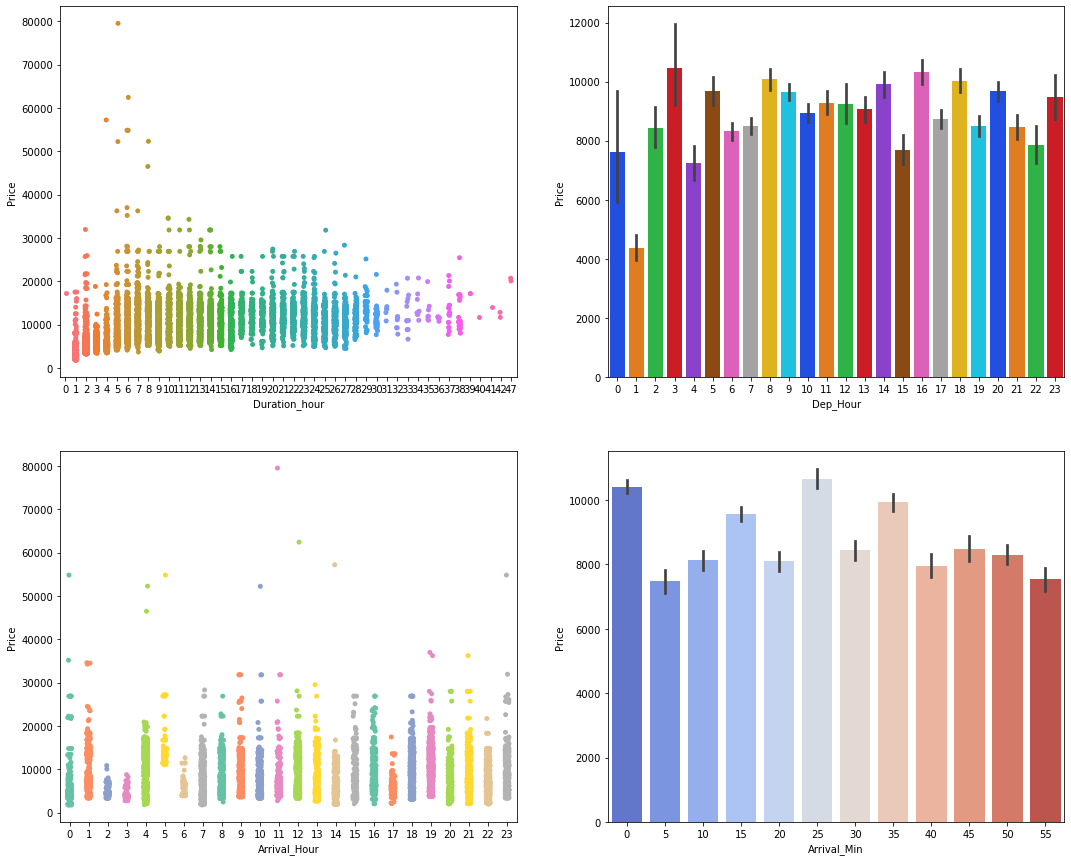

In [49]:
fig,axes=plt.subplots(2,2,figsize=(18,15))

# Checking relation between Duration_hours and Price
sns.stripplot(x='Duration_hour',y='Price',ax=axes[0,0],data=df_train,palette="husl")

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[0,1],data=df_train,palette="bright")

# Checking relation between Arrival_Hour and Price
sns.stripplot(x='Arrival_Hour',y='Price',ax=axes[1,0],data=df_train, palette="Set2")

# Checking relation between Arriva_Mins and Price
sns.barplot(x='Arrival_Min',y='Price',ax=axes[1,1],data=df_train,palette="coolwarm")
plt.show()

From the above plots we can observe there is no much significance differences in any of the classes with the Price.

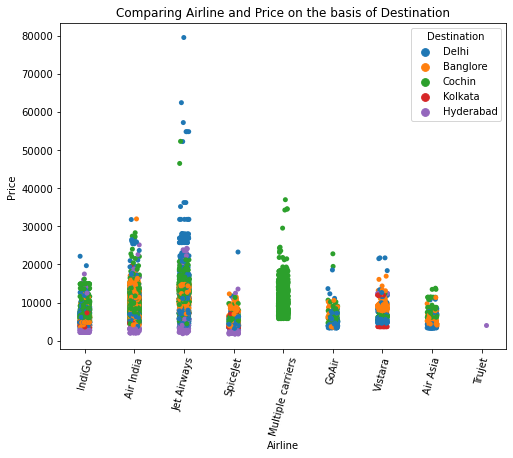

In [50]:
# Checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=df_train['Airline'],y=df_train['Price'],hue=df_train["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others.

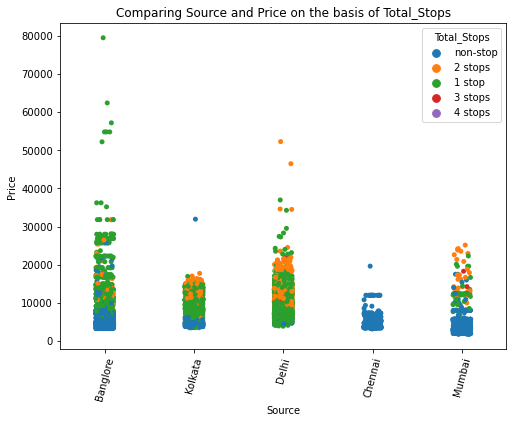

In [51]:
# Checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df_train['Source'],y=df_train['Price'],hue=df_train["Total_Stops"])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can notice that the flights in the Bangalore source which have only one stop between source and destination have bery expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights.

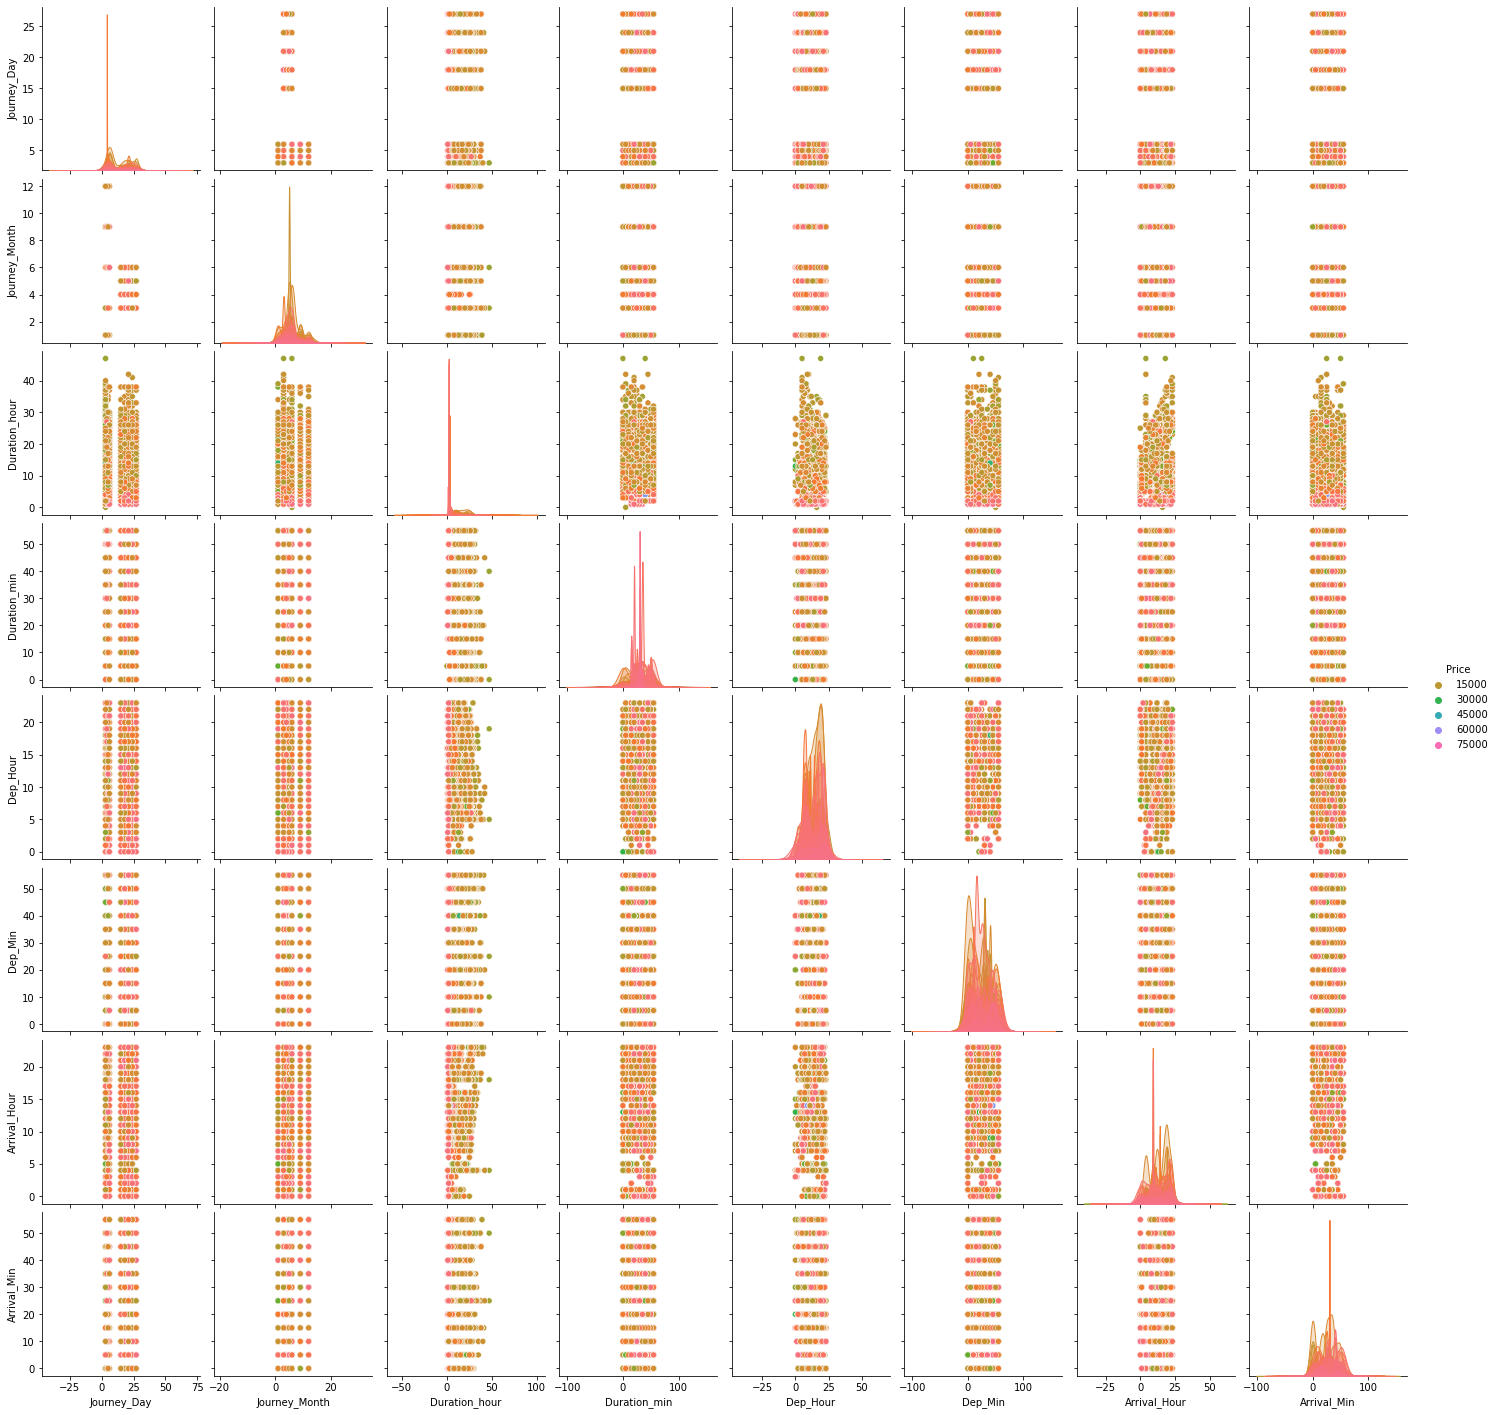

In [52]:
sns.pairplot(df_train,hue="Price",palette="husl")
plt.show()

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
- Here we can observe the correaltion between the features and on the diagonal we cna notice hte distribution plot which shows whether the column has skewness or not.
- We can notice the linear relation between the features.

## Identifying the outliers

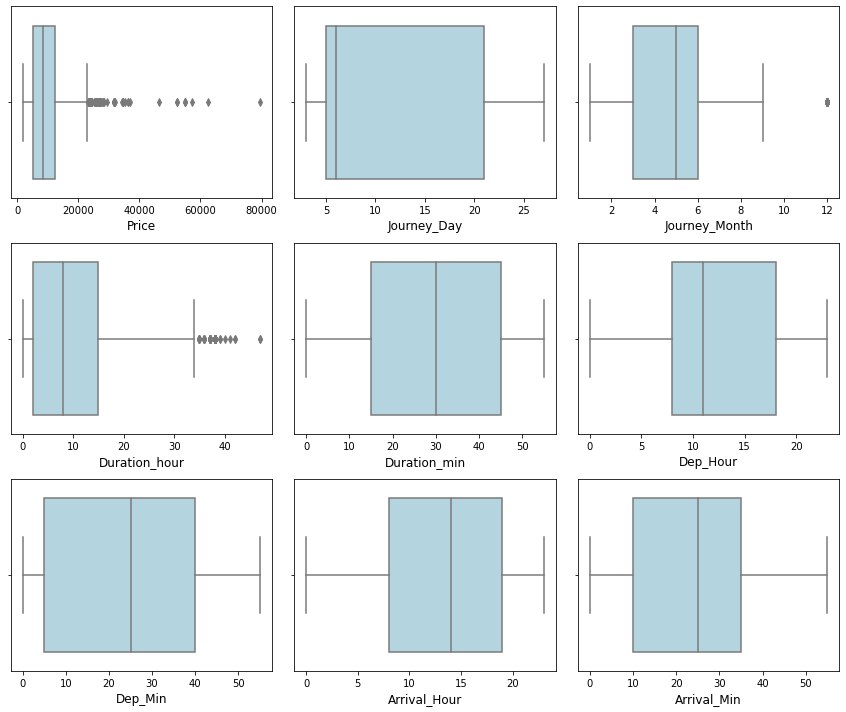

In [53]:
# Identifying the outliers using boxplot

plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df_train[column],color="lightblue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- The outliers present in Price, Journey_Month and Duration_hour.
- Since Price is our target column so no need to remove outliers in this columns.
- And remaining two columns Duration_hours and Jpurney_Month are numerical so we can remove outliers in these columns using either Zscore method or IQR method.

## Removing outliers
### 1.Zscore method

In [54]:
# Feature containing outliers
feature = df_train[['Duration_hour','Journey_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

array([[0.97069753, 0.84850298],
       [0.38211718, 1.5179928 ],
       [1.03047566, 1.15996647],
       ...,
       [0.85298146, 0.51375808],
       [0.97069753, 1.5179928 ],
       [0.26440111, 1.15996647]])

Now we have removed the outliers.

In [55]:
# Creating new dataframe
df_train_new = df_train[(z<3).all(axis=1)] 
df_train_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,2,40,11,30,14,10


In [56]:
# Shape of original dataset
df_train.shape

(10683, 15)

In [57]:
# Shape of new dataframe
df_train_new.shape

(10617, 15)

In [58]:
# Checking the the data loss
data_loss = (10683-10617)/10683*100
data_loss

0.6178039876439202

Here we are losing very less data hence removing outliers.

Let's remove the outliers and check data loss using IQR method.

## 2. IQR (Inter Quantile Range) method

In [59]:
# 1st quantile
Q1=feature.quantile(0.25)

# 3rd quantile
Q3=feature.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
df1.shape

(9657, 15)

In [61]:
# Let's check the dataloss
data_loss = (10683-9657)/10683*100
data_loss

9.604043807919124

Using IQR method we are losing 9.6% data. Let's consider Zscore method only.

## Checking skewness in the data

In [62]:
# Checking the skewness
df_train_new.skew()

Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Duration_hour    0.761022
Duration_min    -0.097354
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

- We can find the columns Price, Journey_Month and Duration_hours have skewness but will remove skewness in Duration_hours and Journey_Month as they are numerical columns.
- The column Price is our target so no need to remove skewness in this column

## Removing skewness using log transformation

In [63]:
df_train_new["Duration_hour"] = np.log1p(df_train_new["Duration_hour"])
df_train_new["Journey_Month"] = np.log1p(df_train_new["Journey_Month"])

In [64]:
# Again checking skewness
df_train_new.skew()

Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Duration_hour   -0.109197
Duration_min    -0.097354
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

We can observe the skewness has been removed in Duration_hours and Journey_Month columns. Let's visualize it.

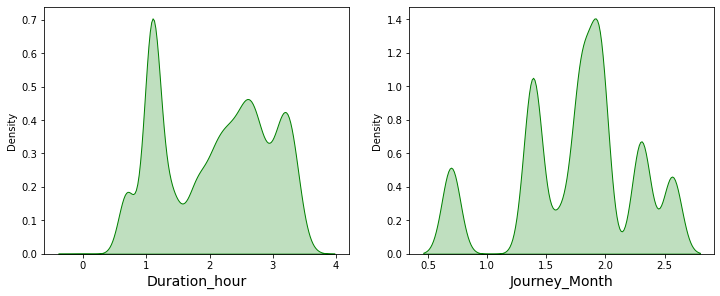

In [65]:
# Checking how the data has been distributed after removing the skewness
skew = ["Duration_hour","Journey_Month"]
plt.figure(figsize=(12,10), facecolor='white')
plotnumber = 1

for column in df_train_new[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_train_new[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()

The data looks almost normal and skewness is also removed.

## Taking care of categorical columns using label encoding method

In [66]:
# checking for categorical columns
categorical_col=[]
for i in df_train.dtypes.index:
    if df_train.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [67]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [68]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_train_new[categorical_col]= df_train_new[categorical_col].apply(LE.fit_transform)
df_train_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,1.098612,50,22,20,1,10
1,1,3,0,84,1,5,7662,5,0.693147,2.079442,25,5,50,13,15
2,4,2,1,118,1,5,13882,6,2.302585,2.995732,0,9,25,4,25
3,3,3,0,91,0,5,6218,5,2.564949,1.791759,25,18,5,23,30
4,3,0,2,29,0,5,13302,3,0.693147,1.609438,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,1.098612,30,19,55,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,1.098612,35,20,45,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,1.386294,0,8,20,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,1.098612,40,11,30,14,10


## Correlation between the target variable and independent variables using HEAT map

In [69]:
# Checking the correlation between features and the target
cor = df_train_new.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.076407,-0.043858,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.149110,-0.145872,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.493825,0.021895,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,0.383743,-0.229643,-0.070005,-0.066420,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,-0.806706,0.182696,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.255705,0.059669,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.605075,-0.122893,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.041874,-0.008671,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.062242,-0.023684,0.020587,-0.005264,-0.005743,-0.031453
Duration_hour,-0.076407,0.149110,-0.493825,0.383743,-0.806706,-0.255705,0.605075,-0.041874,0.062242,1.000000,-0.166151,0.000980,-0.033117,0.060794,-0.127237


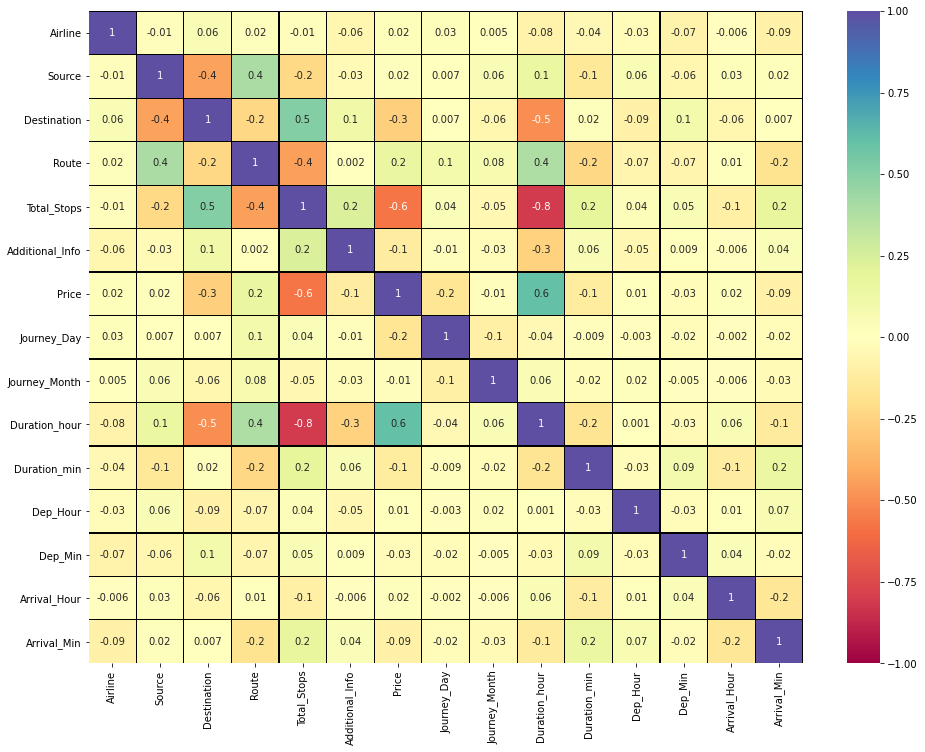

In [70]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,12))    
sns.heatmap(cor,linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="Spectral")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

- This heat map contains both positive and negative correlation.
- The feature Duration_hours is highly positively correlated with the target variable Price.
- The feature Total_Stops is highly Negatively correlated with the label.
- The features Duration_hours and Total_Stops, Duration_hours and Destination are highly negatively correlated with each other. This may lead to multicollinearity problem so we will check the VIF value to solve this, if we get the features having VIF more than 10 then we can drop those columns.

In [71]:
cor['Price'].sort_values(ascending=False)

Price              1.000000
Duration_hour      0.605075
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Duration_min      -0.122893
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

Here we can notice the positive and negative correlation of target and features.

## Visualizing the correlation between label and features using bar plot

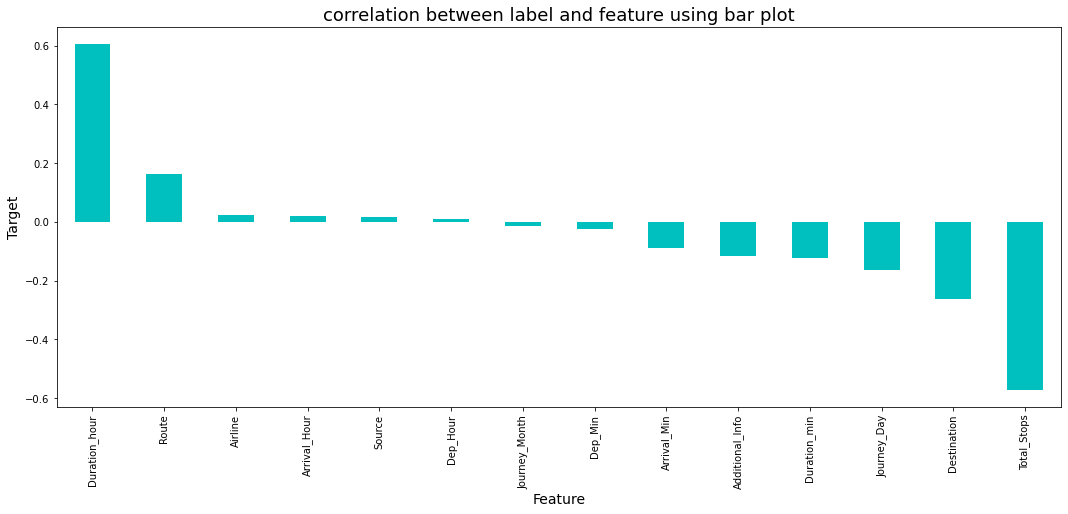

In [72]:
plt.figure(figsize=(18,7))
df_train_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The features Journey_Month, Source,Arrival_Hour and Airline have very less correlation with the label so we can drop these columns if necessary.

## Separating the feature and label into x and y

In [73]:
x = df_train_new.drop("Price", axis=1)
y = df_train_new["Price"]

In [74]:
# Dimension of x
x.shape

(10617, 14)

In [75]:
# Dimension of y
y.shape

(10617,)

## Feature Scaling using Standard Scalarization

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hour,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,-1.183984,1.274299,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,-0.009867,-0.201145,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,1.086993,-1.676590,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,-0.354241,-0.201145,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,-0.572492,0.979210,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,-1.183984,0.093944,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,-1.183984,0.389033,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.839609,-1.676590,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-1.183984,0.684121,-0.266894,0.296976,0.099677,-0.889208


## Checking VIF

In [77]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.044046,Airline
1,1.511995,Source
2,1.762240,Destination
3,1.583264,Route
4,3.330957,Total_Stops
5,1.107199,Additional_Info
6,1.035552,Journey_Day
7,1.022110,Journey_Month
8,3.175330,Duration_hour
9,1.125160,Duration_min


Here we can notice the VIF value is less than 10 in all the columns. We are free from multicollinearity problem now so let's move to build our machine learning models.

## Modeling
## Finding the best random state

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9215534408552412  on Random_state  181


## Feature Importance

,Importance
Features,
Duration_hour,0.431
Journey_Day,0.121
Airline,0.098
Journey_Month,0.073
Additional_Info,0.068
Total_Stops,0.048
Route,0.040
Dep_Hour,0.027
Arrival_Hour,0.027


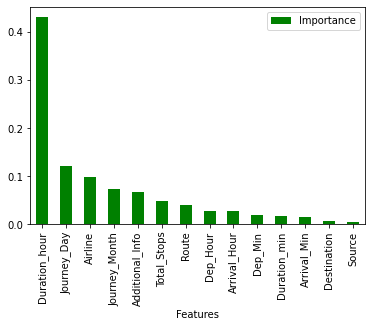

In [81]:
# Lets check the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
importances = pd.DataFrame({'Features':x.columns,'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.plot.bar(color='g')
importances

With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

## Creating new train test split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [83]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Random Forest Regressor

The R2_Score is: 0.9156653560206516
The Mean Absolute Error is: 658.4194080089977
The Mean Squared Error is: 1709799.360191159
The Root Mean Squared Error is: 1307.5929642634053


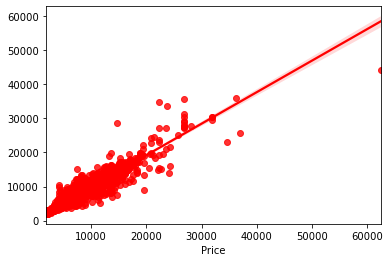

In [84]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)


predRFR=RFR.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predRFR))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predRFR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predRFR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Visualizing the predicted values
sns.regplot(y_test,predRFR,color="r")
plt.show()

The predicted R2 score using Random Forest Regressor is 91.56%.

## Decision Tree Regressor

The R2_Score is: 0.8443377814844097
The Mean Absolute Error is: 703.4025946850805
The Mean Squared Error is: 3155893.5813977816
The Root Mean Squared Error is: 1776.483487510588


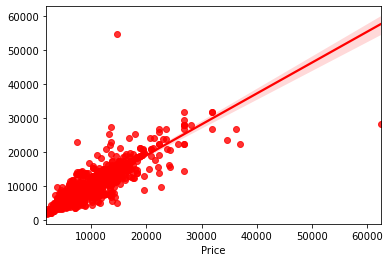

In [86]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)


predDTR=DTR.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predDTR))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predDTR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predDTR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="r")
plt.show()

The predicted R2 score using Decision Tree Regressor is 84.43%.

## GradientBoosting Regressor

The R2_Score is: 0.8373310805182478
The Mean Absolute Error is: 1233.0892562726956
The Mean Squared Error is: 3297947.3361030035
The Root Mean Squared Error is: 1816.0251474313354


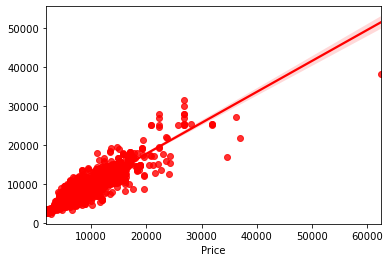

In [88]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)


predGB=GB.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predGB))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predGB))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predGB))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="r")
plt.show()

The predicted R2 score using Gradient Boosting Regressor is 83.73%.

## BaggingRegressor

The R2_Score is: 0.9111282514909269
The Mean Absolute Error is: 681.2725166651719
The Mean Squared Error is: 1801784.5522309032
The Root Mean Squared Error is: 1342.3056850922235


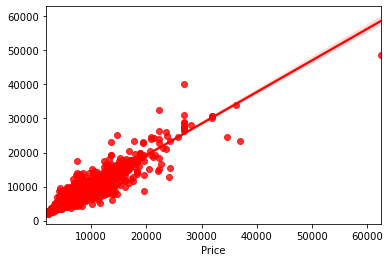

In [90]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)


predBR=BR.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predBR))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predBR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predBR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="r")
plt.show()

The predicted R2 score using Bagging Regressor is 91.11%.

## ExtraTrees Regressor

The R2_Score is: 0.9224991440505138
The Mean Absolute Error is: 628.7477003557229
The Mean Squared Error is: 1571251.239871809
The Root Mean Squared Error is: 1253.4956082379424


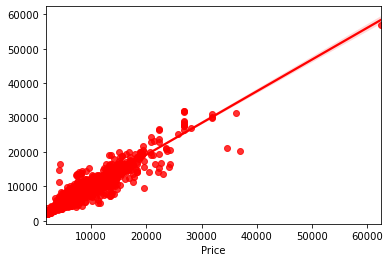

In [92]:
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)


predXT=XT.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predXT))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predXT))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predXT))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="r")
plt.show()

The predicted R2 score using Extra Trees Regressor is 92.24%.

## XGB Regressor

The R2_Score is: 0.9149629299351701
The Mean Absolute Error is: 756.0239834830361
The Mean Squared Error is: 1724040.3365547026
The Root Mean Squared Error is: 1313.027165200592


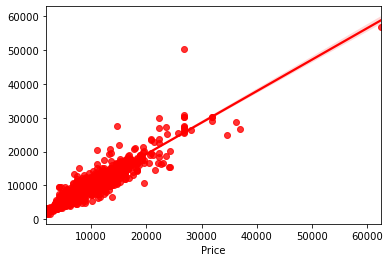

In [93]:
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)


predXGB=XGB.predict(x_test)
print('The R2_Score is:',r2_score(y_test,predXGB))


print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predXGB))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predXGB))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predXGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="r")
plt.show()

The predicted R2 score using XGB Regressor is 91.49%.

## Checking the cross validation score

In [94]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Random Forest Regressor
print("The Cross Validation Score for Random Forest Regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print("The Cross Validation Score for Decision Tree Regressor is:",cross_val_score(DTR,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print("The Cross Validation Score for Gradient Boosting Regressor is:",cross_val_score(GB,x,y,cv=5).mean())

# Checking cv score for Bagging Regressor
print("The Cross Validation Score for Bagging Regressor is:",cross_val_score(BR,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print("The Cross Validation Score for ExtraTrees Regressor is:",cross_val_score(XT,x,y,cv=5).mean())

# Checking cv score for XGBRegressor
print("The Cross Validation Score for XGB Regressor is:",cross_val_score(XGB,x,y,cv=5).mean())

The Cross Validation Score for Random Forest Regressor is: 0.87711418305595
The Cross Validation Score for Decision Tree Regressor is: 0.7872620493322783
The Cross Validation Score for Gradient Boosting Regressor is: 0.8082999129201213
The Cross Validation Score for Bagging Regressor is: 0.8719494541582588
The Cross Validation Score for ExtraTrees Regressor is: 0.8970419333814009
The Cross Validation Score for XGB Regressor is: 0.8943838253338647


From the differences between the R2 score and Cross Validation Score we can conclude that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

## Hyper parameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [97]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [99]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 400, 'n_jobs': -2}

In [100]:
Final_model = xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs=-2)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
print('The R2_Score is:',r2_score(y_test,pred)*100)
print("The Root Mean Squared value is:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, pred))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, pred))

The R2_Score is: 91.0367724642861
The Root Mean Squared value is: 1348.036892158447
The Mean Absolute Error is: 793.923939927
The Mean Squared Error is: 1817203.4626202045


### After tuning the R2 score of the best model is 91%.

## Saving the model

In [101]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

## Predicting the saved model

In [102]:
# Loading the saved model
Model=joblib.load("Flight_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 2901.786 ,  8086.8364, 13396.036 , ...,  8224.711 ,  9049.691 ,
       14785.417 ], dtype=float32)

In [103]:
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3176,3177,3178,3179,3180,3181,3182,3183,3184,3185
Predicted,2901.785889,8086.836426,13396.036133,7250.871582,4335.577148,12980.414062,4864.194824,30928.941406,1871.12793,13217.674805,...,7963.66748,8100.267578,13596.595703,15304.404297,4023.634766,14727.685547,5474.195801,8224.710938,9049.691406,14785.416992
Original,2470.000000,8996.000000,13029.000000,6416.000000,4148.000000,13712.000000,5224.000000,36235.000000,2575.00000,13628.000000,...,7480.00000,7480.000000,13941.000000,15129.000000,3873.000000,14571.000000,6478.000000,8016.000000,8366.000000,13759.000000


## Test Data

## Importing Test dataset

In [104]:
# Reading the excel file from dataset
test_df = pd.read_excel("Test_set_flight_price.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use our past data(trained data) to get the ticket price prediction.

In [106]:
# Checking the dimension of the dataset
test_df.shape

(2671, 10)

There are 2671 rows and 10 columns are there in test dataset. All the columns are independent and there is no dependent variable in this dataset.

In [107]:
# Checking how many columns are there in the dataset
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [108]:
# Checking the types of the dataset
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns have object datatype. We will convert them into numerical using encoding method. Before that we will perform some feature engineering.

## Feature Engineering
- The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.
- Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [110]:
# Converting Date and Time columns from object type to Date Type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [111]:
# Again checking the type of dataset
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now we have converted object data type into datetime data type.

First will split Date_of_Journey into Month and day, since the dataset contains only 2019 year data so no need to take year column.

In [114]:
# Extracting Day from Date_of_Journey column
test_df["Journey_Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
test_df["Journey_Month"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [115]:
# Dropping Date_of_Journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

The column Duration has values in terms of minutes and hours. Duration means the time taken by the pane to reach the destination and it is the difference between Departure time and the arrival time. Now let's extract hours and minutes from Duration.

In [116]:
# Converting duration column into list
duration=list(test_df["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains oly hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'   
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [117]:
# Adding duration hours and duration mins to the data set
test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

# Dropping Duration column
test_df.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [119]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

Now we have extracted hour and minute from Dep_Time column so we can drop this column as it is of no use.

In [120]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.

In [121]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns, let's check the data frame after feature engineering.

In [123]:
# Checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [124]:
test_df.shape

(2671, 14)

In [125]:
# Checking the value counts of each columns
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('****************************************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
****************************************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
****************************************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
****************************************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → 

In [126]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [127]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())
    print("**********************************")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
**********************************
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
**********************************
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Long layover                       1
Change airports                    1
Name: Additional_Info, dtype: int64
**********************************


In [128]:
# Checking number of unique values in each column
test_df.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration_hours      41
Duration_mins       12
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [129]:
# Checking null values in the dataframe
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

There are no missing values present in any of the columns.

## Description of Test Dataset

In [130]:
# Statistical summary of dataset
test_df.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

- The counts of every column is same which means there are no missing values preent in the dataset.
- The mean value is greater than the median(50%) in the columns Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right.
- The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.
- In summarizing the data we can observe that there is bit differences between 75% and max which means some outliers present in the data.

In [131]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [132]:
# Now checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


## Identifying the outliers

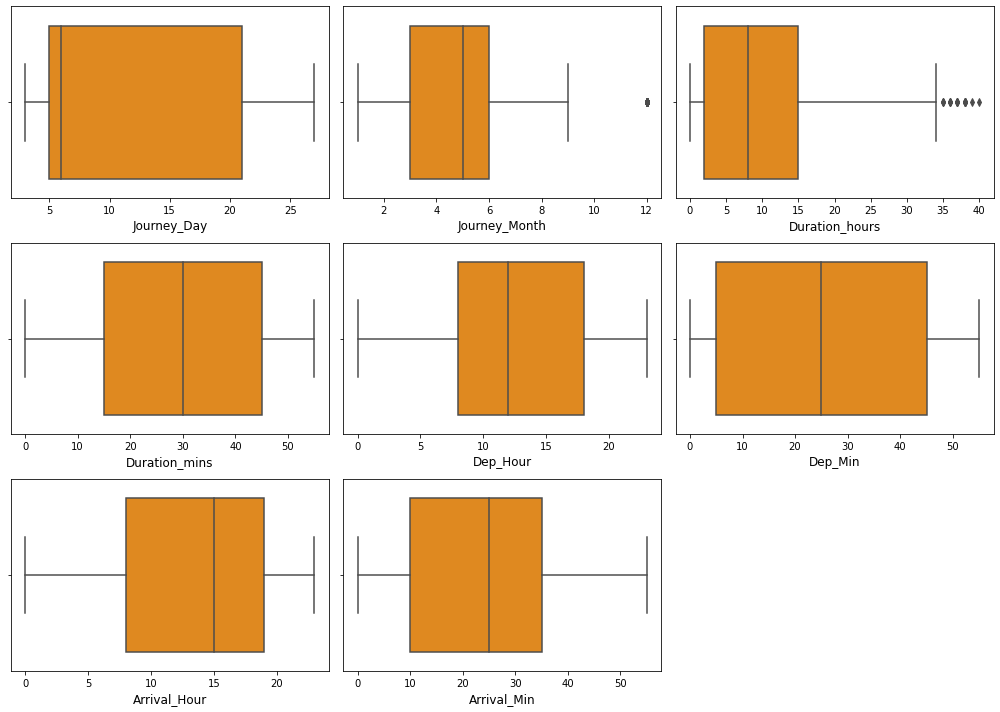

In [133]:
# Identifying the outliers using boxplot

plt.figure(figsize=(14,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can notice the outliers in Journey_Month and Duration_hours, let's remove outliers using Zscore method.

## Removing outliers
## Zscore method

In [134]:
# Feature containing outliers
feature = test_df[['Duration_hours','Journey_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

array([[0.02253728, 0.12908857],
       [0.73775001, 2.10122721],
       [1.5270903 , 0.1996012 ],
       ...,
       [0.49934577, 0.12908857],
       [0.57347333, 0.12908857],
       [0.45427121, 0.12908857]])

In [135]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


In [136]:
# Shape of original dataset
test_df.shape

(2671, 14)

In [137]:
# Shape of new dataframe
new_test_df.shape

(2653, 14)

In [138]:
# Checking the the data loss
data_loss = (2671-2653)/2671*100
data_loss

0.6739049045301385

Here we are losing very less data hence removing outliers.

## Checking skewness in the data

In [139]:
# Checking the skewness
new_test_df.skew()

Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

The columns Journey_Month and Duration_hours contains skewness since they are continuous data so we will try to remove skewness using log transformation method.

## Removing skewness using log transformation

In [141]:
new_test_df["Duration_hours"] = np.log1p(new_test_df["Duration_hours"])
new_test_df["Journey_Month"] = np.log1p(new_test_df["Journey_Month"])

In [142]:
# Again checking skewness
new_test_df.skew()

Journey_Day       0.475210
Journey_Month    -0.541053
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

The skewness has been removed now.

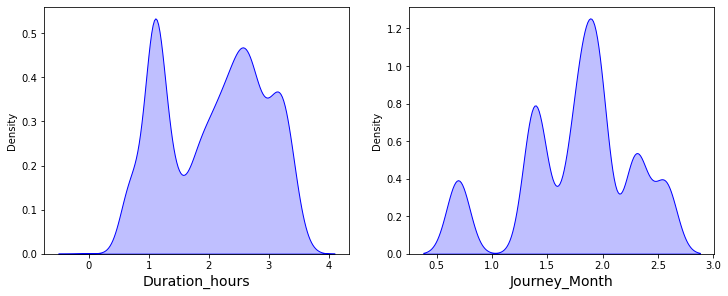

In [144]:
# Checking how the data has been distributed after removing the skewness
skew = ["Duration_hours","Journey_Month"]
plt.figure(figsize=(12,10), facecolor='white')
plotnumber = 1

for column in new_test_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_test_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()

We can observe the data is almost normal compared and skewness is also not there.

## Taking care of categorical columns using label encoding method

In [146]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [147]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [148]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


## Feature Scaling using Standard Scalarization

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

We have already loaded the saved model after saving the final model. Now let's predict the flight price using test data.

## Prediction Results

In [150]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = Model.predict(new_test_df)
Predicted_Price

array([13681.307,  4625.892, 12331.761, ..., 17254.76 , 13192.548,
        7430.343], dtype=float32)

Here we are using our predicted final model which is saved as Model to predict the price of the test dataset that was provided and containing only the features.

## Creating DataFrame and Saving the predictions

In [151]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13681.306641
1,4625.892090
2,12331.760742
3,10622.694336
4,2774.596191
...,...
2648,9334.910156
2649,5227.926758
2650,17254.759766
2651,13192.547852


Here we are adding the predicted price output to our original test dataset to complete it with features and target column.

In [153]:
## Saving the predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)

With the help of .to_csv we have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.

We have successfully completed predicting the flight prices of various Airlines